In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao2"
CAND1_PATH = "data/paredao2/babu.csv"
CAND2_PATH = "data/paredao2/petrix.csv"
CAND3_PATH = "data/paredao2/pyong.csv"
CAND4_PATH = "data/paredao2/hadson.csv"
DATE = 2
IGNORE_HASHTAGS = ["#bbb20", "#redebbb"]

In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)
candidate3_df = pd.read_csv(CAND3_PATH)
candidate4_df = pd.read_csv(CAND4_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment", "date", "likes_count", "retweets_count", "hashtags"]]
cand2 = candidate2_df[["tweet", "sentiment", "date", "likes_count", "retweets_count", "hashtags"]]
cand3 = candidate3_df[["tweet", "sentiment", "date", "likes_count", "retweets_count", "hashtags"]]
cand4 = candidate4_df[["tweet", "sentiment", "date", "likes_count", "retweets_count", "hashtags"]]

# Babu

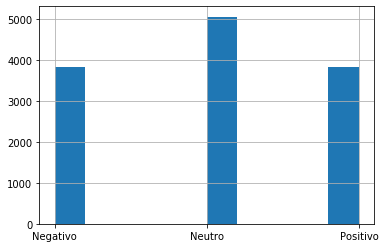

In [5]:
cand1["sentiment"].hist()

# Petrix (Eliminado)

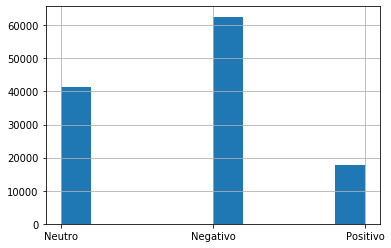

In [7]:
cand2["sentiment"].hist()

# Pyong

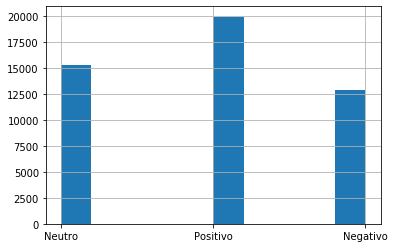

In [9]:
cand3["sentiment"].hist()

# Hadson

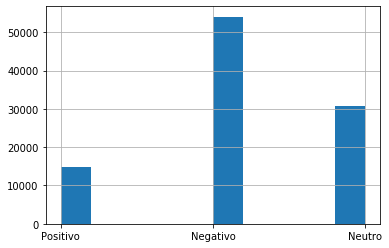

In [11]:
cand4["sentiment"].hist()

# Quantidades absolutas

In [13]:
candidates = {"babu": cand1, "petrix": cand2, "pyong": cand3, "hadson": cand4}

In [14]:
qtds_df = get_raw_quantities(candidates)

In [15]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,3819,5049,3822
petrix,17850,41331,62584
pyong,19947,15248,12907
hadson,14732,30837,54056


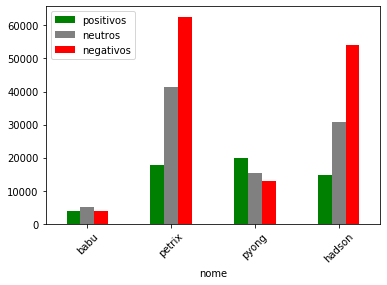

In [16]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [17]:
pcts_df = get_pct_by_candidate(candidates)

In [18]:
pcts_df

,positivos,neutros,negativos
nome,,,
babu,0.300946,0.397872,0.301182
petrix,0.146594,0.339433,0.513974
pyong,0.414681,0.316993,0.268326
hadson,0.147875,0.309531,0.542595


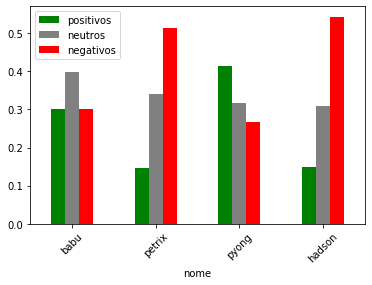

In [19]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [20]:
qtds_df_copy = qtds_df.copy()

In [21]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [22]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,0.067775,0.054604,0.028657
petrix,0.316781,0.446991,0.469254
pyong,0.353997,0.164906,0.096777
hadson,0.261447,0.333499,0.405312


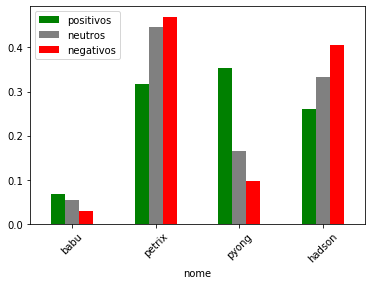

In [23]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Tweets por dia

In [24]:
names = list(candidates.keys())
tweets_by_day_df = get_tweets_by_day(candidates[names[0]], names[0])
for name in names[1:]:
    current = get_tweets_by_day(candidates[name], name)
    tweets_by_day_df = tweets_by_day_df.append(current)

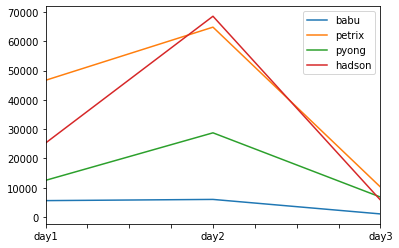

In [25]:
tweets_by_day_df.transpose().plot()

# Análise de hashtags

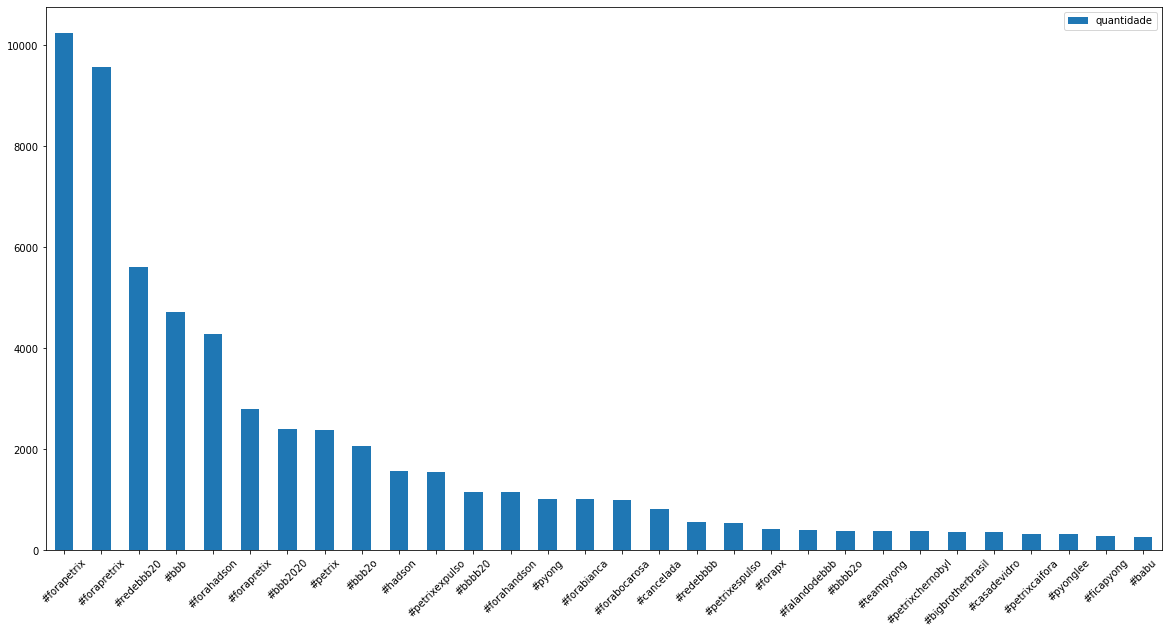

In [26]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

unique_df = get_unique_hashtags(list(candidates.values()))
unique_df.drop(index=IGNORE_HASHTAGS, inplace=True)
unique_df.sort_values(by="quantidade", ascending=False).head(30).plot.bar(rot=45)

In [27]:
alias = {name: name for name in candidates.keys()}
fica_fora_df = get_fica_fora_quantities(unique_df, alias)

In [28]:
fica_fora_df

,fica,fora
babu,39,141
petrix,62,10253
pyong,293,112
hadson,24,4289


# Seleção de atributos

In [29]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_individual_pct")
atributes_df = atributes_df.join(qtds_df, rsuffix="_global_pct")
atributes_df = atributes_df.join(tweets_by_day_df)
atributes_df = atributes_df.join(fica_fora_df)

In [30]:
raw_participantes_info = get_participantes_info()[DATE]
print("Seguidores atualizados em:", raw_participantes_info["date"])

Seguidores atualizados em: 25-03-2020


In [31]:
participantes_info = raw_participantes_info["infos"]
paredoes_info = get_paredoes_info()

In [32]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]

In [33]:
likes = [get_likes_count(candidates[participante]) for participante in atributes_df.index]

In [34]:
retweets = [get_retweets_count(candidates[participante]) for participante in atributes_df.index]

In [35]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [36]:
atributes_df["likes"] = likes
atributes_df["retweets"] = retweets
atributes_df["seguidores"] = followers
atributes_df["rejeicao"] = rejection

In [37]:
atributes_df

,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,fica,fora,likes,retweets,seguidores,rejeicao
nome,,,,,,,,,,,,,,,,,,
babu,3819,5049,3822,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,6016,1068,39,141,313738,57539,325345,0.0044
petrix,17850,41331,62584,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,64815,10271,62,10253,3036821,776919,22414,0.8027
pyong,19947,15248,12907,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,28745,6830,293,112,1889184,357422,1431039,0.0066
hadson,14732,30837,54056,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,68537,5825,24,4289,2416937,583604,10207,0.1863


In [38]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))